In [1]:
import pandas as pd
import numpy as np
from pandas import cut # 等距离散化
from pandas import qcut # 等频离散化
from sklearn.preprocessing import Binarizer # 二值化
from sklearn.impute import SimpleImputer # 缺失值处理
from sklearn.neighbors import LocalOutlierFactor # 离群值处理
from sklearn.preprocessing import StandardScaler # 标准化
from sklearn.preprocessing import MinMaxScaler # 标准化
from sklearn.preprocessing import RobustScaler # 标准化
from sklearn.preprocessing import OneHotEncoder # 特征编码
from sklearn.preprocessing import LabelEncoder # 特征编码
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") # 不显示warnings

In [2]:
data = pd.read_csv("./vehicles_4000.csv",index_col=0)
data_copy = data.copy()

# 一、探索性分析

In [3]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [4]:
data.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
3995,7190378980,https://reno.craigslist.org/ctd/d/rancho-cordo...,reno / tahoe,https://reno.craigslist.org,29999,2018.0,gmc,acadia,excellent,6 cylinders,...,4wd,NaN,SUV,red,https://images.craigslist.org/00404_brCEJoTMCP...,Finance @ www.ElegantAutoSales.net Call ☏ 916−...,NaN,ca,38.615,-121.272
3996,7190378750,https://reno.craigslist.org/ctd/d/rancho-cordo...,reno / tahoe,https://reno.craigslist.org,59999,2014.0,NaN,Maserati GranTurismo,excellent,8 cylinders,...,rwd,NaN,coupe,grey,https://images.craigslist.org/00X0X_hZUFzA4HC5...,Finance @ www.ElegantAutoSales.net Call ☏ 916−...,NaN,ca,38.615,-121.272
3997,7190378403,https://reno.craigslist.org/ctd/d/rancho-cordo...,reno / tahoe,https://reno.craigslist.org,19999,2017.0,subaru,forester,excellent,4 cylinders,...,4wd,NaN,SUV,blue,https://images.craigslist.org/00y0y_fjmLHl9Q0D...,Finance @ www.ElegantAutoSales.net Call ☏ 916−...,NaN,ca,38.615,-121.272
3998,7190378203,https://reno.craigslist.org/ctd/d/rancho-cordo...,reno / tahoe,https://reno.craigslist.org,15999,2013.0,bmw,x5,excellent,6 cylinders,...,4wd,NaN,SUV,white,https://images.craigslist.org/00p0p_hUwup1ZJV6...,Finance @ www.ElegantAutoSales.net Call ☏ 916−...,NaN,ca,38.615,-121.272
3999,7190377968,https://reno.craigslist.org/ctd/d/rancho-cordo...,reno / tahoe,https://reno.craigslist.org,7999,2003.0,audi,allroad,excellent,6 cylinders,...,4wd,NaN,SUV,grey,https://images.craigslist.org/00c0c_c6cvLYu4yn...,Finance @ www.ElegantAutoSales.net Call ☏ 916−...,NaN,ca,38.615,-121.272


In [5]:
data.sample(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
3499,7191433781,https://reno.craigslist.org/ctd/d/sacramento-2...,reno / tahoe,https://reno.craigslist.org,39995,2014.0,toyota,tundra,excellent,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00b0b_c5FmchQtF7...,2014 *** Toyota Tundra Limited 4x4 4dr Double ...,NaN,ca,38.6242,-121.4010
524,7184277276,https://winchester.craigslist.org/ctd/d/fisher...,winchester,https://winchester.craigslist.org,3995,2000.0,infiniti,i30,excellent,6 cylinders,...,fwd,mid-size,sedan,green,https://images.craigslist.org/00404_909ABaJuly...,2000 Infiniti I30 Touring 4dr Sedan Sedan EX...,NaN,va,38.9674,-78.4096
1342,7185557326,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,38500,2018.0,ford,f-150,NaN,6 cylinders,...,4wd,NaN,truck,NaN,https://images.craigslist.org/00f0f_2i1JYewwwQ...,2018 Ford F-150 XLT Truck STOCK #: F2...,NaN,wa,48.7550,-122.4660


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4000 non-null   int64  
 1   url           4000 non-null   object 
 2   region        4000 non-null   object 
 3   region_url    4000 non-null   object 
 4   price         4000 non-null   int64  
 5   year          3999 non-null   float64
 6   manufacturer  3831 non-null   object 
 7   model         3946 non-null   object 
 8   condition     1995 non-null   object 
 9   cylinders     2331 non-null   object 
 10  fuel          3992 non-null   object 
 11  odometer      3385 non-null   float64
 12  title_status  3990 non-null   object 
 13  transmission  3981 non-null   object 
 14  vin           2512 non-null   object 
 15  drive         2847 non-null   object 
 16  size          1052 non-null   object 
 17  type          3101 non-null   object 
 18  paint_color   2665 non-null 

In [7]:
data.isnull().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               1
manufacturer     169
model             54
condition       2005
cylinders       1669
fuel               8
odometer         615
title_status      10
transmission      19
vin             1488
drive           1153
size            2948
type             899
paint_color     1335
image_url          0
description        0
county          4000
state              0
lat               12
long              12
dtype: int64

In [8]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.000000e+03,4.000000e+03,3999.000000,3.385000e+03,0.0,3988.000000,3988.000000
mean,7.188352e+09,2.001030e+04,2010.144536,8.985422e+04,NaN,40.568278,-106.995927
std,4.098174e+06,1.604683e+05,10.578448,8.748926e+04,NaN,6.959093,15.982171
min,7.179432e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,7.815840,-123.823000
25%,7.185234e+09,5.990000e+03,2007.000000,3.611100e+04,NaN,35.088000,-119.824000
50%,7.187247e+09,1.250000e+04,2013.000000,7.900000e+04,NaN,39.772150,-116.359000
75%,7.191358e+09,2.299900e+04,2017.000000,1.286470e+05,NaN,46.384400,-95.124700
max,7.195198e+09,9.999999e+06,2020.000000,2.564237e+06,NaN,48.970600,-71.977400


In [9]:
data.describe(include='all') # include 为 object 时指定非数值型数据

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
count,4.000000e+03,4000,4000,4000,4.000000e+03,3999.000000,3831,3946,1995,2331,...,2847,1052,3101,2665,4000,4000,0.0,4000,3988.000000,3988.000000
unique,NaN,4000,25,26,NaN,NaN,35,1774,6,8,...,3,4,13,12,3762,3852,NaN,12,NaN,NaN
top,NaN,https://duluth.craigslist.org/ctd/d/duluth-200...,kennewick-pasco-richland,https://kpr.craigslist.org,NaN,NaN,ford,f-150,excellent,4 cylinders,...,4wd,full-size,SUV,white,https://images.craigslist.org/00X0X_6D1pEb70p5...,Biggest Public Auction in Southern Cali Suba...,NaN,wa,NaN,NaN
freq,NaN,1,668,668,NaN,NaN,751,85,988,919,...,1477,506,875,747,4,4,NaN,1269,NaN,NaN
mean,7.188352e+09,NaN,NaN,NaN,2.001030e+04,2010.144536,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.568278,-106.995927
std,4.098174e+06,NaN,NaN,NaN,1.604683e+05,10.578448,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.959093,15.982171
min,7.179432e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.815840,-123.823000
25%,7.185234e+09,NaN,NaN,NaN,5.990000e+03,2007.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.088000,-119.824000
50%,7.187247e+09,NaN,NaN,NaN,1.250000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.772150,-116.359000
75%,7.191358e+09,NaN,NaN,NaN,2.299900e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.384400,-95.124700


In [10]:
data1 = data.dropna(axis=1,thresh=int(len(data))*0.8)

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4000 non-null   int64  
 1   url           4000 non-null   object 
 2   region        4000 non-null   object 
 3   region_url    4000 non-null   object 
 4   price         4000 non-null   int64  
 5   year          3999 non-null   float64
 6   manufacturer  3831 non-null   object 
 7   model         3946 non-null   object 
 8   fuel          3992 non-null   object 
 9   odometer      3385 non-null   float64
 10  title_status  3990 non-null   object 
 11  transmission  3981 non-null   object 
 12  image_url     4000 non-null   object 
 13  description   4000 non-null   object 
 14  state         4000 non-null   object 
 15  lat           3988 non-null   float64
 16  long          3988 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 562.5+ KB


In [12]:
data2 = data1.dropna()

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3225 non-null   int64  
 1   url           3225 non-null   object 
 2   region        3225 non-null   object 
 3   region_url    3225 non-null   object 
 4   price         3225 non-null   int64  
 5   year          3225 non-null   float64
 6   manufacturer  3225 non-null   object 
 7   model         3225 non-null   object 
 8   fuel          3225 non-null   object 
 9   odometer      3225 non-null   float64
 10  title_status  3225 non-null   object 
 11  transmission  3225 non-null   object 
 12  image_url     3225 non-null   object 
 13  description   3225 non-null   object 
 14  state         3225 non-null   object 
 15  lat           3225 non-null   float64
 16  long          3225 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 453.5+ KB


# 二、缺失值处理

In [15]:
data11=data.drop(columns=['id','url','region_url','image_url','description','lat','long'])

In [16]:
data12=data11.dropna(axis=1,thresh=int(len(data)*0.8))

In [17]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4000 non-null   object 
 1   price         4000 non-null   int64  
 2   year          3999 non-null   float64
 3   manufacturer  3831 non-null   object 
 4   model         3946 non-null   object 
 5   fuel          3992 non-null   object 
 6   odometer      3385 non-null   float64
 7   title_status  3990 non-null   object 
 8   transmission  3981 non-null   object 
 9   state         4000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 343.8+ KB


In [18]:
data13 = data12.dropna()

In [19]:
data13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3234 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        3234 non-null   object 
 1   price         3234 non-null   int64  
 2   year          3234 non-null   float64
 3   manufacturer  3234 non-null   object 
 4   model         3234 non-null   object 
 5   fuel          3234 non-null   object 
 6   odometer      3234 non-null   float64
 7   title_status  3234 non-null   object 
 8   transmission  3234 non-null   object 
 9   state         3234 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 277.9+ KB


**<font size='4'>2.1 SimpleImputer填充</font>**<br>

In [20]:
data21 = data12.copy()

In [21]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4000 non-null   object 
 1   price         4000 non-null   int64  
 2   year          3999 non-null   float64
 3   manufacturer  3831 non-null   object 
 4   model         3946 non-null   object 
 5   fuel          3992 non-null   object 
 6   odometer      3385 non-null   float64
 7   title_status  3990 non-null   object 
 8   transmission  3981 non-null   object 
 9   state         4000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 343.8+ KB


In [22]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit(data21[["odometer","year"]])
data21[["odometer","year"]]=imp_mean.transform(data21[["odometer","year"]])

In [23]:
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
data21[["manufacturer","model","fuel","title_status","transmission"]]=\
imp_mode.fit_transform(data21[["manufacturer","model","fuel","title_status","transmission"]])

In [24]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4000 non-null   object 
 1   price         4000 non-null   int64  
 2   year          4000 non-null   float64
 3   manufacturer  4000 non-null   object 
 4   model         4000 non-null   object 
 5   fuel          4000 non-null   object 
 6   odometer      4000 non-null   float64
 7   title_status  4000 non-null   object 
 8   transmission  4000 non-null   object 
 9   state         4000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 343.8+ KB


**<font size='4'>2.2 fillna填充</font>**<br>

In [25]:
data22=data.dropna(axis=1,thresh=int(len(data)*.8))

In [26]:
data22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4000 non-null   int64  
 1   url           4000 non-null   object 
 2   region        4000 non-null   object 
 3   region_url    4000 non-null   object 
 4   price         4000 non-null   int64  
 5   year          3999 non-null   float64
 6   manufacturer  3831 non-null   object 
 7   model         3946 non-null   object 
 8   fuel          3992 non-null   object 
 9   odometer      3385 non-null   float64
 10  title_status  3990 non-null   object 
 11  transmission  3981 non-null   object 
 12  image_url     4000 non-null   object 
 13  description   4000 non-null   object 
 14  state         4000 non-null   object 
 15  lat           3988 non-null   float64
 16  long          3988 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 562.5+ KB


In [27]:
for i in data22.columns:
    data22[[i]]=data22[[i]].fillna(method="ffill")

In [28]:
data22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4000 non-null   int64  
 1   url           4000 non-null   object 
 2   region        4000 non-null   object 
 3   region_url    4000 non-null   object 
 4   price         4000 non-null   int64  
 5   year          4000 non-null   float64
 6   manufacturer  4000 non-null   object 
 7   model         4000 non-null   object 
 8   fuel          4000 non-null   object 
 9   odometer      4000 non-null   float64
 10  title_status  4000 non-null   object 
 11  transmission  4000 non-null   object 
 12  image_url     4000 non-null   object 
 13  description   4000 non-null   object 
 14  state         4000 non-null   object 
 15  lat           4000 non-null   float64
 16  long          4000 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 562.5+ KB


# 三、特征编码

**<font size='4'>3.1 Label编码</font>**<br>

In [29]:
data31 = data21.copy()

In [30]:
data31['transmission'].value_counts()

automatic    3618
manual        304
other          78
Name: transmission, dtype: int64

In [31]:
LBE = LabelEncoder()
LBE.fit(data31[['transmission']])

LabelEncoder()

In [32]:
LBE.classes_

array(['automatic', 'manual', 'other'], dtype=object)

In [33]:
data31['transmission'] = LBE.transform(data31.transmission.values)

In [34]:
data31.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,gas,167783.000000,clean,0,mn
1,duluth / superior,8750,2013.0,hyundai,sonata,gas,90821.000000,clean,0,mn
2,new haven,10900,2013.0,toyota,prius,hybrid,92800.000000,clean,0,ct
3,albuquerque,12500,2003.0,mitsubishi,lancer,gas,89854.224815,clean,1,nm
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,diesel,254217.000000,clean,0,mn


**<font size='4'>3.2 map编码</font>**<br>

In [35]:
data32 = data31.copy()

In [36]:
data32.fuel.value_counts()

gas         3555
diesel       284
other        111
hybrid        37
electric      13
Name: fuel, dtype: int64

In [37]:
data32["fuel"] = data32.fuel.map({"gas":0,"diesel":1,"other":2,"hybrid":3,"electric":4})

In [38]:
data32.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4000 non-null   object 
 1   price         4000 non-null   int64  
 2   year          4000 non-null   float64
 3   manufacturer  4000 non-null   object 
 4   model         4000 non-null   object 
 5   fuel          4000 non-null   int64  
 6   odometer      4000 non-null   float64
 7   title_status  4000 non-null   object 
 8   transmission  4000 non-null   int32  
 9   state         4000 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 328.1+ KB


In [39]:
data32.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,0,167783.000000,clean,0,mn
1,duluth / superior,8750,2013.0,hyundai,sonata,0,90821.000000,clean,0,mn
2,new haven,10900,2013.0,toyota,prius,3,92800.000000,clean,0,ct
3,albuquerque,12500,2003.0,mitsubishi,lancer,0,89854.224815,clean,1,nm
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,1,254217.000000,clean,0,mn


**<font size='4'>3.3 get_dummies</font>**<br>

In [40]:
data33=pd.get_dummies(data['fuel'],prefix="T",drop_first=True)

In [41]:
data33.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   T_electric  4000 non-null   uint8
 1   T_gas       4000 non-null   uint8
 2   T_hybrid    4000 non-null   uint8
 3   T_other     4000 non-null   uint8
dtypes: uint8(4)
memory usage: 46.9 KB


In [42]:
data33.head()

,T_electric,T_gas,T_hybrid,T_other
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,0,0


**<font size='4'>3.4 OneHot编码</font>**<br>

In [43]:
OHE=OneHotEncoder(drop='first') # 实例化对象，并删除第一行

In [44]:
data34 = data21.copy()

In [45]:
data341 = OHE.fit_transform(data34[["transmission"]])

In [46]:
data342 = pd.DataFrame(data341.toarray())

In [47]:
data342

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
3995,0.0,0.0
3996,0.0,0.0
3997,0.0,0.0
3998,0.0,0.0


# 四、离群值的处理、统计（箱线图）

In [48]:
data32.describe()

,price,year,fuel,odometer,transmission
count,4.000000e+03,4000.000000,4000.000000,4.000000e+03,4000.000000
mean,2.001030e+04,2010.144536,0.167250,8.985422e+04,0.115000
std,1.604683e+05,10.577125,0.537912,8.048116e+04,0.375247
min,0.000000e+00,1900.000000,0.000000,0.000000e+00,0.000000
25%,5.990000e+03,2007.000000,0.000000,4.249200e+04,0.000000
50%,1.250000e+04,2013.000000,0.000000,8.985422e+04,0.000000
75%,2.299900e+04,2017.000000,0.000000,1.178922e+05,0.000000
max,9.999999e+06,2020.000000,4.000000,2.564237e+06,2.000000


**<font size='4'>4.1 3西格玛</font>**<br>

In [49]:
mean_ = data32.price.mean()

In [50]:
std_ = data32.price.std()

In [51]:
mean_,std_

(20010.2955, 160468.29947739185)

In [52]:
data41 = data32[data32.price<mean_+3*std_][data32.price>mean_-3*std_] # 保留3西格玛内的样本

In [53]:
data41[['price']].describe()

,price
count,3998.000000
mean,17145.118309
std,17079.489800
min,0.000000
25%,5990.000000
50%,12500.000000
75%,22999.000000
max,239999.000000


**<font size='4'>4.2 箱线图</font>**<br>

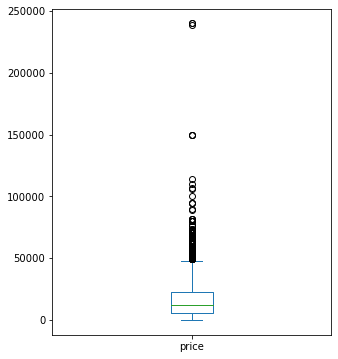

In [54]:
# plt.figure(figsize=(25,22))
data41[['price']].plot(kind='box',figsize=(5,6))
plt.show()

In [55]:
data_desc = data41[['price']].describe()

In [56]:
data_desc

,price
count,3998.000000
mean,17145.118309
std,17079.489800
min,0.000000
25%,5990.000000
50%,12500.000000
75%,22999.000000
max,239999.000000


In [57]:
data_desc = data_desc.T

In [58]:
data_desc

,count,mean,std,min,25%,50%,75%,max
price,3998.0,17145.118309,17079.4898,0.0,5990.0,12500.0,22999.0,239999.0


In [59]:
IQR = data_desc["75%"].values-data_desc["25%"].values

In [64]:
max = data_desc["75%"].values+1.5*IQR
min = data_desc["25%"].values-1.5*IQR

In [65]:
max[0],min[0]

(48512.5, -19523.5)

In [66]:
data41.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        3998 non-null   object 
 1   price         3998 non-null   int64  
 2   year          3998 non-null   float64
 3   manufacturer  3998 non-null   object 
 4   model         3998 non-null   object 
 5   fuel          3998 non-null   int64  
 6   odometer      3998 non-null   float64
 7   title_status  3998 non-null   object 
 8   transmission  3998 non-null   int32  
 9   state         3998 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 328.0+ KB


In [67]:
data42 = data41[data41.price<max[0]][data41.price>min[0]]

In [68]:
data42[['price']].describe()

,price
count,3803.000000
mean,14636.246121
std,11824.339725
min,0.000000
25%,5500.000000
50%,11750.000000
75%,20984.000000
max,48000.000000


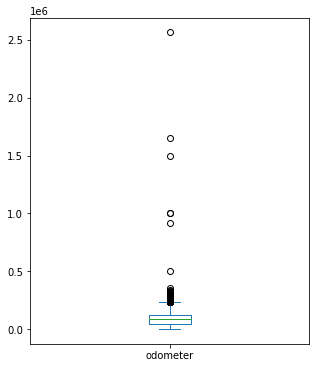

In [69]:
data42[['odometer']].plot(kind='box',figsize=(5,6))
plt.show()

In [70]:
mean_o = data42.odometer.mean()
std_o = data42.odometer.std()
data422 = data42[data42.odometer<mean_o+3*std_o][data42.odometer>mean_o-3*std_o] # 保留3西格玛内的样本

In [71]:
data_desc_2 = data422[['odometer']].describe().T
IQR_o = data_desc_2["75%"].values-data_desc_2["25%"].values
max_o = data_desc_2["75%"].values+1.5*IQR_o
min_o = data_desc_2["25%"].values-1.5*IQR_o
data423 = data422[data422.price<max_o[0]][data422.price>min_o[0]]

In [72]:
data423.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        3795 non-null   object 
 1   price         3795 non-null   int64  
 2   year          3795 non-null   float64
 3   manufacturer  3795 non-null   object 
 4   model         3795 non-null   object 
 5   fuel          3795 non-null   int64  
 6   odometer      3795 non-null   float64
 7   title_status  3795 non-null   object 
 8   transmission  3795 non-null   int32  
 9   state         3795 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 311.3+ KB


In [73]:
data423[['odometer']].describe()

,odometer
count,3795.000000
mean,90467.894569
std,56242.138696
min,0.000000
25%,46967.000000
50%,89854.224815
75%,120715.500000
max,336400.000000


**<font size='4'>4.3 LocalOutlierFactor(局部离群因子)</font>**<br>

In [74]:
from sklearn.neighbors import LocalOutlierFactor
lout = LocalOutlierFactor(n_neighbors=30,
algorithm="auto", # 指定用来计算最近邻居的算法，例如auto ball_tree kd_tree brute
leaf_size=20,
metric="minkowski", # 指定计算邻居间距离的方法，根据algorithm不同，适用的metric方法也有不同
p=2, # p用来指定metric=minkowski的情况下的p参数。
metric_params= None,
contamination=0.1, #  设置样本中异常点的比例，
n_jobs=1, # 并行任务数，设置为-1表示使用所有CPU进行工作
novelty=True  # 指定是否用来做新颖性检测                      
)
lout.fit(data32[['odometer']])
data32["odometer_IO"] = lout.predict(data32[["odometer"]])

In [75]:
data32[["odometer_IO"]].value_counts()

odometer_IO
 1             3634
-1              366
dtype: int64

In [76]:
data32[data32.odometer_IO==-1]

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,odometer_IO
1,duluth / superior,8750,2013.0,hyundai,sonata,0,90821.0,clean,0,mn,-1
9,duluth / superior,12995,2004.0,ram,2500,1,309621.0,clean,0,mn,-1
15,duluth / superior,10995,2011.0,chevrolet,silverado 1500,0,208016.0,clean,0,mn,-1
22,duluth / superior,7500,2009.0,ford,f-150,0,271000.0,clean,0,mn,-1
28,albuquerque,9900,2003.0,chevrolet,silverado,1,299000.0,clean,0,nm,-1
...,...,...,...,...,...,...,...,...,...,...,...
3898,albuquerque,42310,2020.0,jeep,gladiator,0,2400.0,clean,0,nm,-1
3940,albuquerque,6500,2014.0,toyota,s,0,119.0,salvage,0,nm,-1
3963,reno / tahoe,9995,2010.0,bmw,3 series,0,107538.0,clean,0,ca,-1
3970,reno / tahoe,27995,2009.0,ford,f-150,0,72110.0,clean,0,ca,-1


In [77]:
data32["LOF"] = -lout.negative_outlier_factor_ # #保存离群因子

In [78]:
data32[["LOF","odometer","odometer_IO"]][data32["LOF"]>1].sample(10)

,LOF,odometer,odometer_IO
3934,1.000814,136201.0,1
3482,1.029793,31372.0,1
878,1.105978,88652.0,-1
1405,1.020652,256000.0,1
3507,1.046536,31157.0,1
2992,1.023126,201457.0,1
1869,1.718786,90719.0,-1
1771,1.035179,59504.0,1
1897,1.030748,103950.0,1
1406,1.040236,136602.0,1


In [79]:
# 删除LOF>1.5的所有行
rows  = [x for x in data32.index if data32.loc[x]['LOF']>1.5]  
data43 = data32.drop(rows, axis=0)

In [80]:
data43.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,odometer_IO,LOF
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,0,167783.000000,clean,0,mn,1,0.983312
1,duluth / superior,8750,2013.0,hyundai,sonata,0,90821.000000,clean,0,mn,-1,1.379508
2,new haven,10900,2013.0,toyota,prius,3,92800.000000,clean,0,ct,1,0.969601
3,albuquerque,12500,2003.0,mitsubishi,lancer,0,89854.224815,clean,1,nm,1,1.000000
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,1,254217.000000,clean,0,mn,1,1.009017


In [81]:
data43[['odometer']].describe()

,odometer
count,3894.000000
mean,87931.376030
std,54787.929353
min,0.000000
25%,43445.000000
50%,89854.224815
75%,117992.250000
max,277000.000000


In [82]:
data43.drop(columns=['odometer_IO','LOF'],inplace=True)

In [83]:
data43.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,0,167783.000000,clean,0,mn
1,duluth / superior,8750,2013.0,hyundai,sonata,0,90821.000000,clean,0,mn
2,new haven,10900,2013.0,toyota,prius,3,92800.000000,clean,0,ct
3,albuquerque,12500,2003.0,mitsubishi,lancer,0,89854.224815,clean,1,nm
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,1,254217.000000,clean,0,mn


# 五、标准化

**<font size='4'>5.1 Z分数标准化</font>**<br>

In [84]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(copy=True)
std.fit(data42[['price']])

StandardScaler()

In [85]:
std.mean_,std.var_,std.scale_

(array([14636.24612148]), array([1.39778246e+08]), array([11822.78501597]))

In [86]:
data42[["price_std"]] = std.transform(data42[["price"]])

In [87]:
data42[['price','price_std']].head(15)

,price,price_std
0,6995,-0.646315
1,8750,-0.497873
2,10900,-0.316021
3,12500,-0.180689
4,16995,0.199509
5,13995,-0.054238
6,7995,-0.561733
7,8995,-0.477150
8,10995,-0.307985
9,12995,-0.138821


In [88]:
price = list(data42.price.values)
price_std = list(data42.price_std.values)

(array([385., 266., 314., 377., 321., 234., 180., 237., 223., 186., 157.,
        129.,  69., 104.,  79.,  90.,  59.,  50.,  52.,  59.,  69.,  27.,
         58.,  38.,  40.]),
 array([-1.2379694 , -1.07557112, -0.91317284, -0.75077455, -0.58837627,
        -0.42597798, -0.2635797 , -0.10118142,  0.06121687,  0.22361515,
         0.38601344,  0.54841172,  0.71081001,  0.87320829,  1.03560657,
         1.19800486,  1.36040314,  1.52280143,  1.68519971,  1.84759799,
         2.00999628,  2.17239456,  2.33479285,  2.49719113,  2.65958941,
         2.8219877 ]),
 <BarContainer object of 25 artists>)

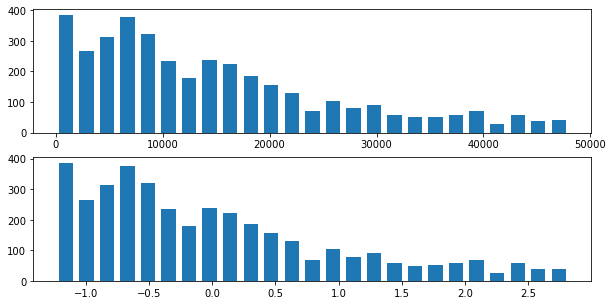

In [89]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(x=price,bins=25,rwidth=0.7) # 未标准化的price数量分布
plt.subplot(212)
plt.hist(x=price_std,bins=25,rwidth=0.7) # 标准化后price数量分布

<AxesSubplot:ylabel='Density'>

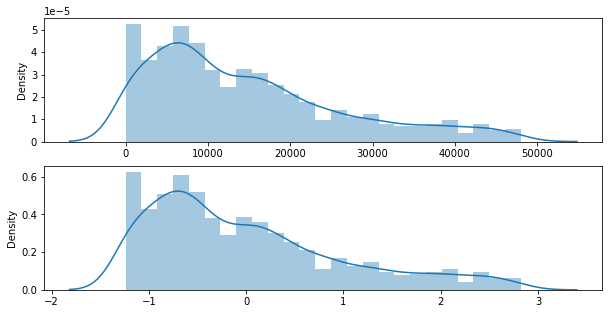

In [90]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.subplot(211)
sns.distplot(price) # 未标准化的price数量分布
plt.subplot(212)
sns.distplot(price_std) # 标准化后price数量分布

**<font size='4'>5.2 MinMaxScaler标准化</font>**<br>

In [91]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(copy=False)
data42['price_mm']=mm.fit_transform(data42[['price']])
data42.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,price_std,price_mm
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,0,167783.000000,clean,0,mn,-0.646315,0.145729
1,duluth / superior,8750,2013.0,hyundai,sonata,0,90821.000000,clean,0,mn,-0.497873,0.182292
2,new haven,10900,2013.0,toyota,prius,3,92800.000000,clean,0,ct,-0.316021,0.227083
3,albuquerque,12500,2003.0,mitsubishi,lancer,0,89854.224815,clean,1,nm,-0.180689,0.260417
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,1,254217.000000,clean,0,mn,0.199509,0.354063


(array([385., 266., 314., 377., 321., 234., 180., 237., 223., 186., 157.,
        129.,  69., 104.,  79.,  90.,  59.,  50.,  52.,  59.,  69.,  27.,
         58.,  38.,  40.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

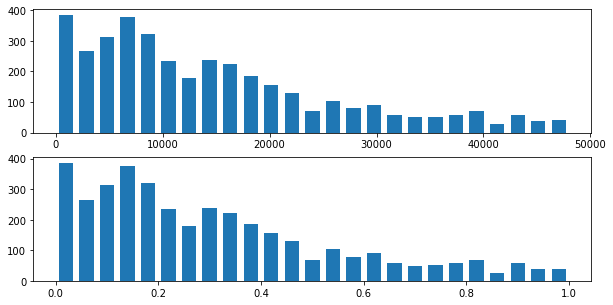

In [92]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(x=price,bins=25,rwidth=0.7) # 未标准化的price数量分布
plt.subplot(212)
price_mm = list(data42.price_mm.values)
plt.hist(x=price_mm,bins=25,rwidth=0.7) # 标准化后price数量分布

**<font size='4'>5.3 RobustScaler标准化</font>**<br>

In [93]:
from sklearn.preprocessing import RobustScaler
rob = RobustScaler(
with_centering=True, # 如果为True，则在标准化之前将数据居中
with_scaling=True, # 如果为True，则将数据缩放到分位数范围
quantile_range=(25.0, 75.0), # 用于计算scale_的分位数范围
copy=True # 如果为False，请尝试避免复制并改为直接替换
)

data42['price_rob']=rob.fit_transform(data42[['price']])
data42.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,price_std,price_mm,price_rob
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,0,167783.000000,clean,0,mn,-0.646315,0.145729,-0.307091
1,duluth / superior,8750,2013.0,hyundai,sonata,0,90821.000000,clean,0,mn,-0.497873,0.182292,-0.193748
2,new haven,10900,2013.0,toyota,prius,3,92800.000000,clean,0,ct,-0.316021,0.227083,-0.054895
3,albuquerque,12500,2003.0,mitsubishi,lancer,0,89854.224815,clean,1,nm,-0.180689,0.260417,0.048437
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,1,254217.000000,clean,0,mn,0.199509,0.354063,0.338737


(array([385., 266., 314., 377., 321., 234., 180., 237., 223., 186., 157.,
        129.,  69., 104.,  79.,  90.,  59.,  50.,  52.,  59.,  69.,  27.,
         58.,  38.,  40.]),
 array([-0.75884784, -0.63484888, -0.51084991, -0.38685094, -0.26285198,
        -0.13885301, -0.01485404,  0.10914492,  0.23314389,  0.35714286,
         0.48114182,  0.60514079,  0.72913976,  0.85313872,  0.97713769,
         1.10113666,  1.22513562,  1.34913459,  1.47313356,  1.59713252,
         1.72113149,  1.84513046,  1.96912942,  2.09312839,  2.21712736,
         2.34112632]),
 <BarContainer object of 25 artists>)

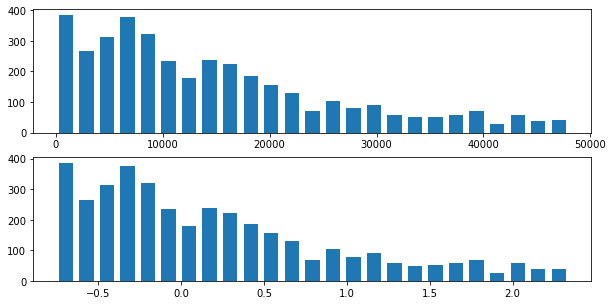

In [94]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(x=price,bins=25,rwidth=0.7) # 未标准化的price数量分布
plt.subplot(212)
price_rob = list(data42.price_rob.values)
plt.hist(x=price_rob,bins=25,rwidth=0.7) # 标准化后price数量分布

# 六、离散化

**<font size='4'>6.1 二值化</font>**<br>

In [95]:
from sklearn.preprocessing import Binarizer
#二值化，阈值设置为10，返回值为二值化后的数据
Bir = Binarizer(threshold=1000)
data61 = data42.copy()
data61["price_Binarized"] = Bir.fit_transform(data61[["price"]])
data61[["price_Binarized","price"]].head()

,price_Binarized,price
0,1,6995
1,1,8750
2,1,10900
3,1,12500
4,1,16995


In [96]:
data61.price_Binarized.value_counts()

1    3485
0     318
Name: price_Binarized, dtype: int64

In [97]:
from sklearn.preprocessing import Binarizer
#二值化，阈值设置为10，返回值为二值化后的数据
Bir = Binarizer(threshold=10000)
data612 = data42.copy()
data612["price_Binarized"] = Bir.fit_transform(data612[["price"]])
data612[["price_Binarized","price"]].head()

,price_Binarized,price
0,0,6995
1,0,8750
2,1,10900
3,1,12500
4,1,16995


In [98]:
data612.price_Binarized.value_counts()

1    2044
0    1759
Name: price_Binarized, dtype: int64

**<font size='4'>6.2 等距离散化</font>**<br>

In [99]:
#等距离散化，各个类比依次命名Price_Number_Label_0...
n=5
d1 = pd.cut(data42["price"], n, labels =["Price_Number_Label_"+str(i) for i in range(n)])

In [100]:
d1.value_counts()

Price_Number_Label_0    1663
Price_Number_Label_1    1060
Price_Number_Label_2     538
Price_Number_Label_3     310
Price_Number_Label_4     232
Name: price, dtype: int64

In [101]:
data62 = data42.copy()
data62["price_cut"] = pd.cut(data42["price"], n, labels =[i for i in range(n)])

In [102]:
data62["price_cut"].value_counts()

0    1663
1    1060
2     538
3     310
4     232
Name: price_cut, dtype: int64

**<font size='4'>6.3 等频离散化</font>**<br>

In [103]:
n=10
d2 = pd.qcut(data42["price"], n, labels =["Price_Number_Label_"+str(i) for i in range(n)])

In [104]:
d2.value_counts()

Price_Number_Label_1    399
Price_Number_Label_5    393
Price_Number_Label_7    386
Price_Number_Label_0    385
Price_Number_Label_4    381
Price_Number_Label_9    380
Price_Number_Label_3    375
Price_Number_Label_8    374
Price_Number_Label_6    368
Price_Number_Label_2    362
Name: price, dtype: int64

In [105]:
data63 = data42.copy()
data63["price_qcut"] = pd.cut(data42["price"], n, labels =[i for i in range(n)])

In [106]:
data63["price_qcut"].value_counts()

1    855
0    808
3    549
2    511
4    334
5    204
6    173
7    137
8    131
9    101
Name: price_qcut, dtype: int64

**<font size='4'>6.4 K-means离散化</font>**<br>

In [107]:
data64 = data42[['price']].copy().dropna()
n = 4
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters = n) # 实例化
kmodel.fit(data64) # fit模型
center_ = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)  # 输出聚类中心，并排序(按“0”特征升序)
l_ = center_.rolling(2).mean().iloc[1:] # 移动平均求相邻两项中点，作为分界点
l_ = [data64.min()[0]] + list(l_[0]) + [data64.max()[0]] # 附加边界点

In [108]:
l_

[0, 10120.048159090915, 20624.936960241423, 32951.51575438629, 48000]

In [109]:
data64["kmeans"] = kmodel.predict(data64)

In [110]:
data64.kmeans.value_counts()

1    1759
2    1081
3     572
0     391
Name: kmeans, dtype: int64

In [111]:
d3 = pd.cut(data64.iloc[:,0], l_, labels =  ['price_0','price_1','price_2','price_3'],include_lowest=True) 
# include_lowest=True表示包含边界最小值包含数据的最小值

In [112]:
d3.value_counts()

price_0    1759
price_1    1081
price_2     572
price_3     391
Name: price, dtype: int64

In [113]:
d3 = pd.DataFrame(d3)

([<matplotlib.axis.XTick at 0x1ba43b80a00>,
 [Text(0, 0, 'price_0'),
  Text(1, 0, 'price_1'),
  Text(2, 0, 'price_2'),
  Text(3, 0, 'price_3')])

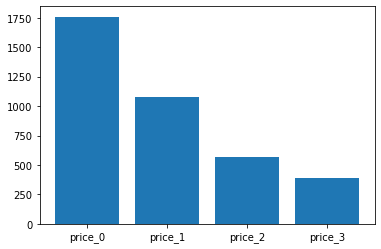

In [114]:
plt.bar(range(4),d3.value_counts().values)
plt.xticks(range(4),['price_0','price_1','price_2','price_3'])